<a href="https://colab.research.google.com/github/Begum-Guney/python-ttest-example/blob/main/ttest_interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# LIBRARY IMPORTS

# numpy: for random data generation (simulate conversion)
import numpy as np

# pandas: for data handling and aggregation
import pandas as pd

# seaborn & matplotlib: for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# scipy.stats: for t-test (hypothesis testing)
from scipy import stats

# statsmodels: for professional confidence interval calculation
import statsmodels.stats.api as sms

# Set seaborn plot style
sns.set(style="whitegrid")


In [2]:
# SIMULATE A/B TEST DATA

# We simulate conversion data using binomial distribution:
# 1 = converted, 0 = not converted

# Group A: control group (existing button design)
np.random.seed(42)
group_a = np.random.binomial(n=1, p=0.12, size=1000)  # 12% conversion rate

# Group B: test group (new button design)
group_b = np.random.binomial(n=1, p=0.15, size=1000)  # 15% conversion rate

# Combine both groups into a pandas DataFrame
df = pd.DataFrame({
    "group": ["A"] * len(group_a) + ["B"] * len(group_b),
    "converted": np.concatenate([group_a, group_b])
})
df.head()

,group,converted
0,A,0
1,A,1
2,A,0
3,A,0
4,A,0


In [3]:
# GROUP-WISE STATISTICS

# Use pandas groupby and agg to calculate mean, count, and sum per group
group_stats = df.groupby("group")["converted"].agg(["mean", "count", "sum"])
print("Group Stats:\n", group_stats)



Group Stats:
         mean  count  sum
group                   
A      0.124   1000  124
B      0.152   1000  152


There is a +2.8 percentage point increase in the conversion rate in Group B.
This raw difference looks promising — but is it statistically significant?

In [4]:
# T-TEST (INDEPENDENT)


# Use scipy.stats to perform independent t-test
# H0: There is no difference in conversion rates between groups
# H1: There is a significant difference
t_stat, p_value = stats.ttest_ind(group_a, group_b)

print("\nT-test result")
print("t-statistic:", round(t_stat, 4))
print("p-value:", round(p_value, 4))


T-test result
t-statistic: -1.8159
p-value: 0.0695


**The result is not statistically significant.**

**p-value:**
The p-value is 0.0695, which is greater than 0.05, this means the result is not statistically significant.

**t-statistic:**
If the t-statistic were > +2 or < –2, we’d often call it “significant”.
But here, |–1.8159| < 2 → it’s close, but not quite enough to be confident.
The negative sign just tells us the direction: difference = A − B < 0

⚠️ If p > 0.05, the result is not statistically significant — t-statistic doesn’t change this.

In [5]:
# CONFIDENCE INTERVAL (95%) for the difference

# Use statsmodels CompareMeans to calculate 95% confidence interval
# This shows the range in which the true difference in conversion rates likely falls

ci = sms.CompareMeans(sms.DescrStatsW(group_b), sms.DescrStatsW(group_a))
conf_int = ci.tconfint_diff()

print("\n95% Confidence Interval for the difference in conversion rates:")
print(f"{conf_int[0]:.4f} to {conf_int[1]:.4f}")




95% Confidence Interval for the difference in conversion rates:
-0.0022 to 0.0582


**The observed difference is not statistically significant** — we cannot rule out the possibility of no effect.

We are 95% confident that the true difference in conversion rates between Group B and Group A lies between -0.22% and +5.82%

The confidence interval includes 0, this means it's possible that there's no real difference at all. So, the result is not statistically significant at the 95% level

<ipython-input-6-e5e7525a1945>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="group", y="converted", ci=95)


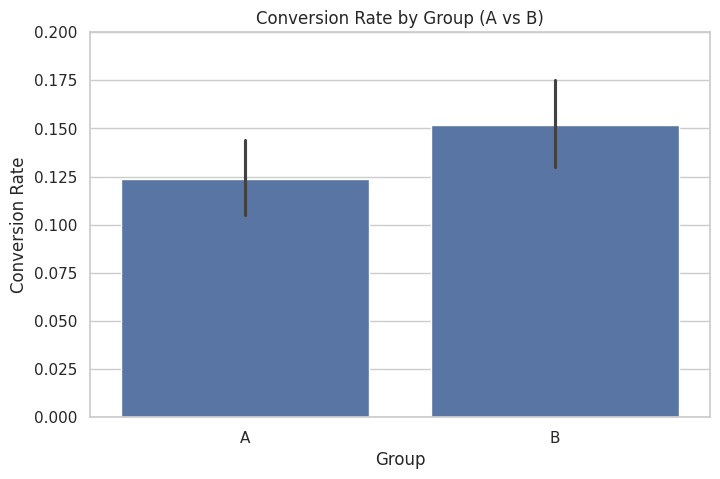

In [6]:
# VISUALIZATION

# Use seaborn barplot to compare conversion rates visually
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="group", y="converted", ci=95)
plt.title("Conversion Rate by Group (A vs B)")
plt.ylabel("Conversion Rate")
plt.xlabel("Group")
plt.ylim(0, 0.2)
plt.show()

**The difference is not statistically significant at the 95% level.**

What we see:
- Group A (control): ~12.4% conversion rate
- Group B (test): ~15.2% conversion rate
- The black vertical lines show the 95% confidence intervals for each group mean.


Group B appears to have a higher conversion rate than Group A, but the confidence intervals overlap slightly — meaning the difference is not statistically significant at the 95% level.”

In summary, the bar for B is taller. But the black lines (error bars) touch → We can’t say for sure B is better.

**Summary:**

Although Group B showed a higher conversion rate (15.2% vs 12.4%), the difference was not statistically significant (p = 0.0695, CI = –0.0022 to 0.0582), suggesting the observed lift may be due to chance.


**Optional next steps:**

- Increase sample size
- Track results longer
- Look for effect size or do a power analysis
